In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

### Import the Data set

In [2]:
df = pd.read_csv("D:\\UNIFIED PROJECTS\\NETFLIX\\netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Remove Duplicates

df.drop_duplicates(inplace=True)
print("Data Shape after dropping duplicates:", df.shape)

Data Shape after dropping duplicates: (8790, 10)


In [5]:
# Replace Null values

print(df.isnull().sum())
df['director'] = df['director'].replace('', 'Not Given')
df['country'] = df['country'].replace('', 'Not Given')

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [6]:
# Convert 'date_added' column to datetime type

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    4404 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [8]:
df.describe()

,date_added,release_year
count,4404,8790.000000
mean,2019-06-11 19:51:10.299727616,2014.183163
min,2009-11-18 00:00:00,1925.000000
25%,2018-06-18 00:00:00,2013.000000
50%,2019-08-16 00:00:00,2017.000000
75%,2020-08-30 06:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [9]:
# Extract Year, Month, Day

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [10]:
# Split duration into number and unit
# Duration example: '90 min' or '1 Season'

df['duration_int'] = df['duration'].str.extract(r"(\d+)").astype(float)
df['duration_unit'] = df['duration'].str.extract(r"([A-Za-z]+)")

### EDA

### Distribution of Content by Type

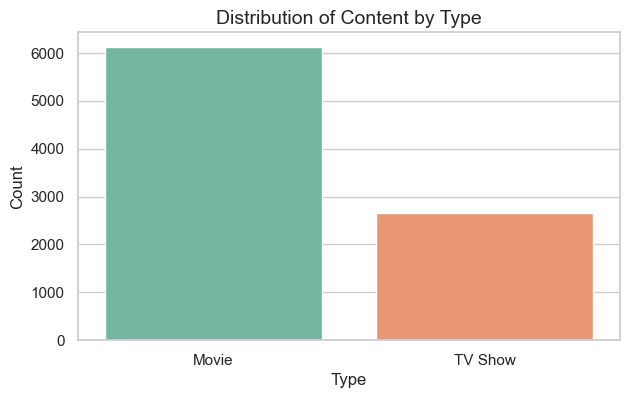

In [11]:
# Distribution of Content Type (Movie vs TV Show)

type_counts = df['type'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

- Most of the Content is Movies.

In [12]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

### Pie chart of Content Type Distribution

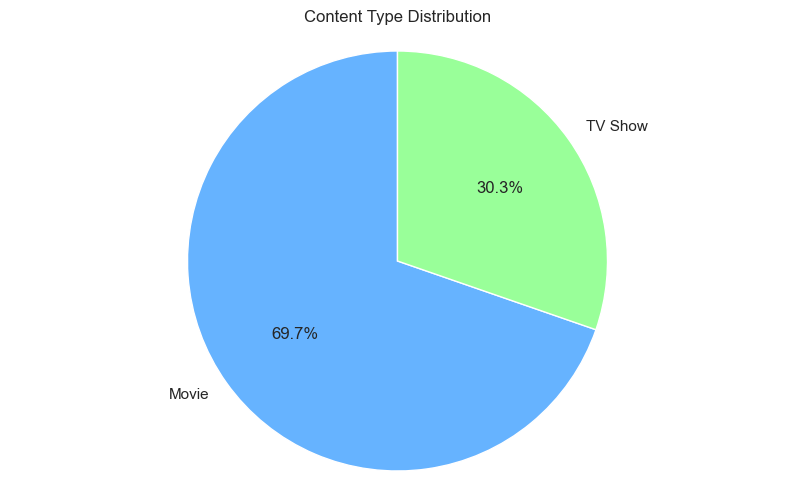

In [13]:
# Pie chart

plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Content Type Distribution')
plt.axis('equal')
plt.show()

- Almost 70% content on Netflix is Movies.

### Top 10 Rating Categories on Netflix

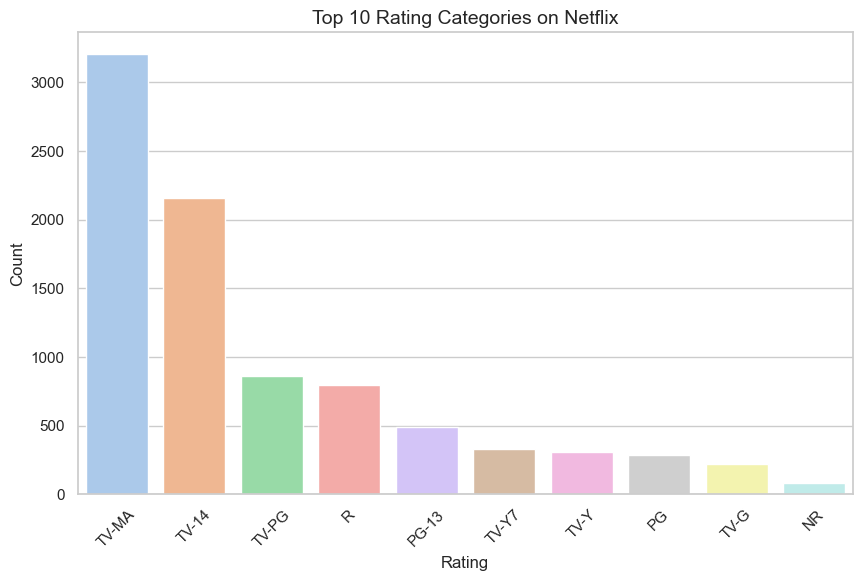

In [14]:
# Rating Distribution

ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=ratings.index, y=ratings.values, palette='pastel')
plt.title('Top 10 Rating Categories on Netflix', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Highest ratings are for the TV-Shows

### Pie chart for Top 10 Ratings on Netflix

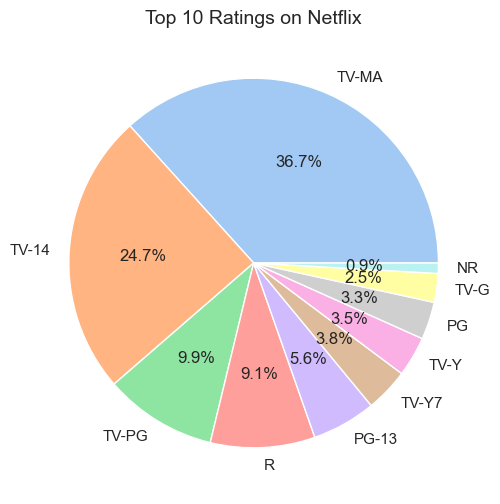

In [15]:
# Rating Distribution as Pie Chart

ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.pie(ratings.values, labels=ratings.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(ratings)))
plt.title('Top 10 Ratings on Netflix', fontsize=14)
plt.show()

### Content Addded on Netflix over Years

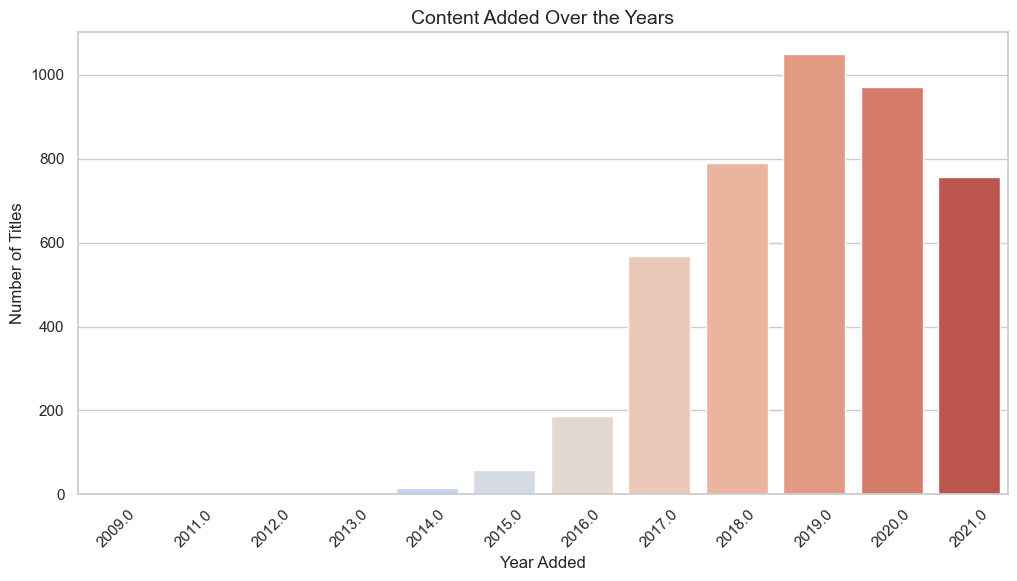

In [16]:
# Content Added Over Time (Year-wise)

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over the Years', fontsize=14)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

- Content addded peaked around 2016 - 2021.

### Distribution of Release Years

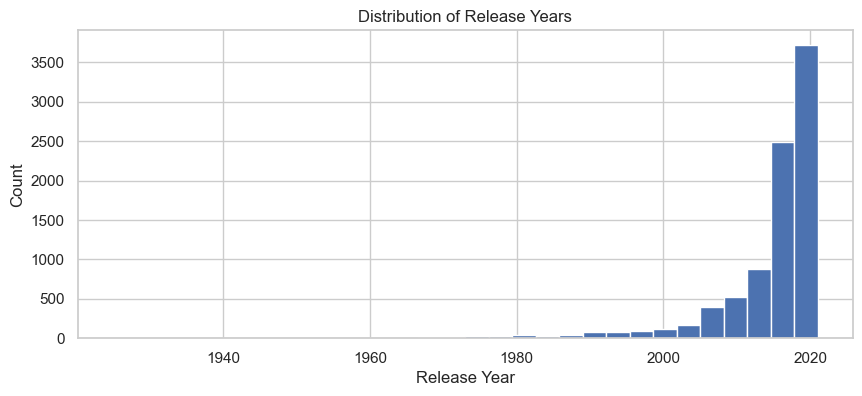

In [17]:
# Release year distribution (1925-2021)

plt.figure(figsize=(10,4))
df['release_year'].hist(bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### Gap between Release and Addition to Netflix in Years

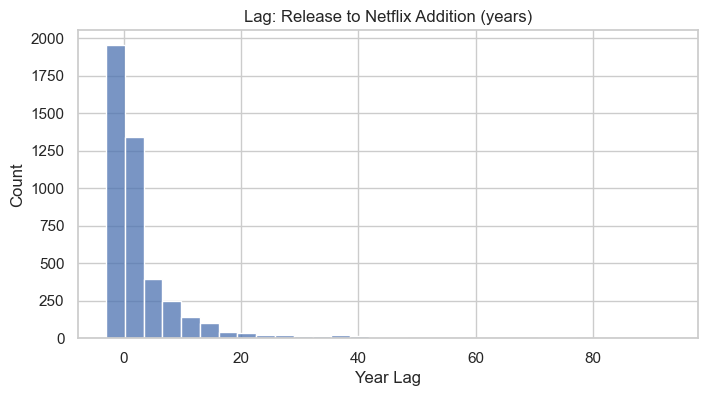

Average lag: 3.7 years


In [18]:
# Gap between release and addition to Netflix

df['year_lag'] = df['year_added'] - df['release_year']
plt.figure(figsize=(8,4))
sns.histplot(df['year_lag'].dropna(), bins=30)
plt.title('Lag: Release to Netflix Addition (years)')
plt.xlabel('Year Lag')
plt.ylabel('Count')
plt.show()
print('Average lag:', df['year_lag'].mean().round(1), 'years')

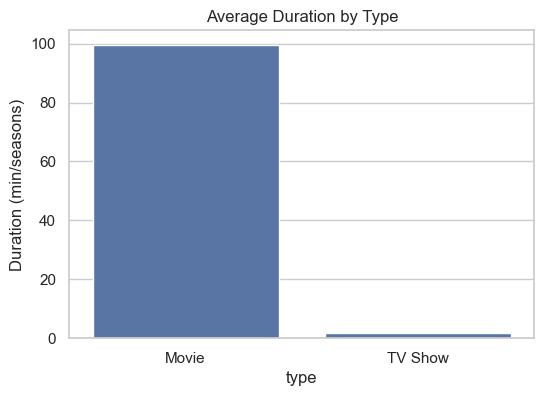

In [19]:
# Average duration by type of Content

avg_dur = df.groupby('type')['duration_int'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=avg_dur, x='type', y='duration_int')
plt.title('Average Duration by Type')
plt.ylabel('Duration (min/seasons)')
plt.show()

### Top 10 Countries Producing Netflix Content

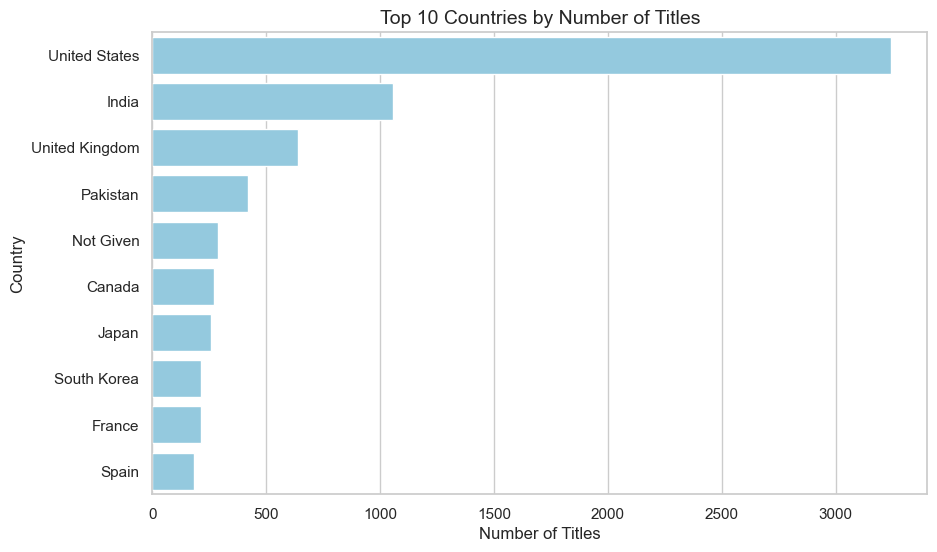

In [20]:
# Top 10 Countries with Most Content

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='skyblue')
plt.title('Top 10 Countries by Number of Titles', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

- United States and Inida are the top Countries producing Netflix content.

### Top 10 Genres On Netflix

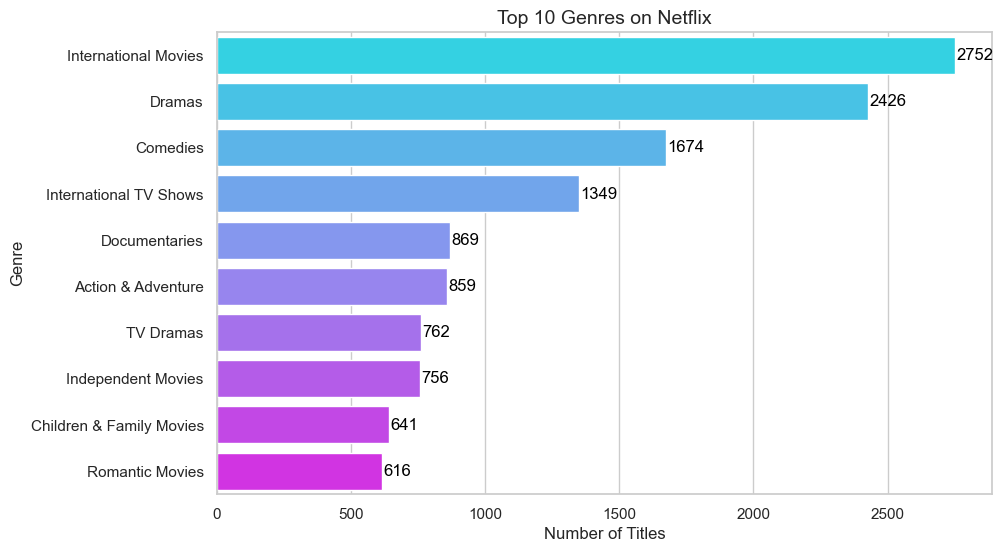

In [21]:
# Most Popular Genres

df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cool')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

# Add values on the bars
for i, v in enumerate(genre_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()


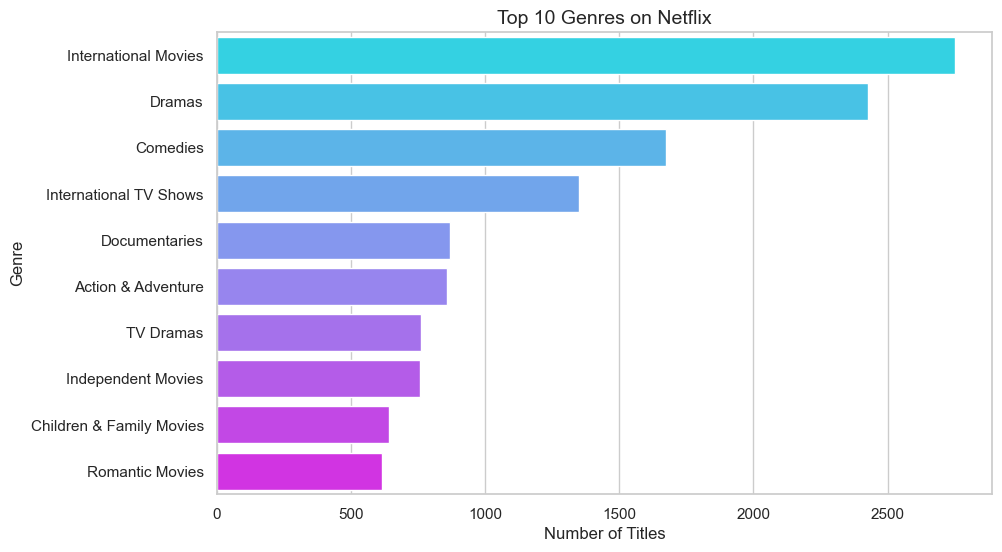

In [22]:
# Most Popular Genres

df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cool')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

- International Movies, Dramas and Comedies are the top genres on Netflix.

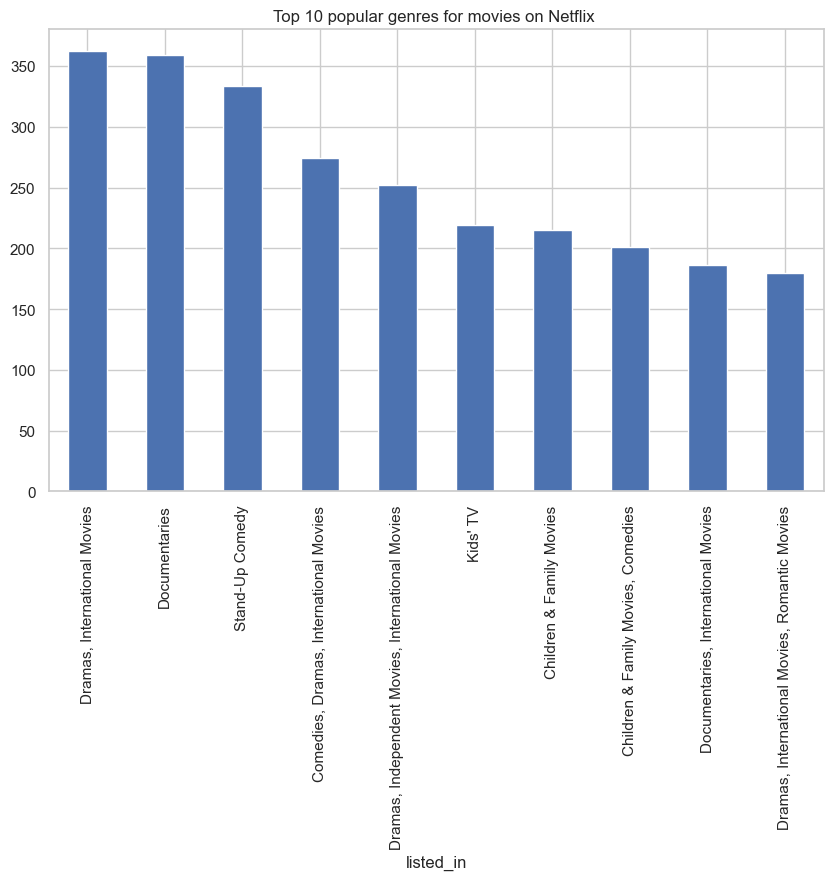

In [23]:
# Top 10 types

top_10_types = df.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')
plt.title('Top 10 popular genres for movies on Netflix ')
plt.show()

### Content Added per Year

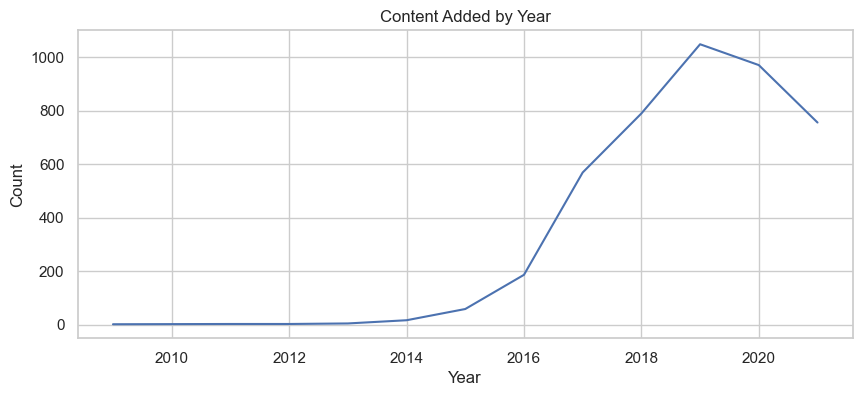

In [24]:
# Content added per year

year_counts = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,4))
year_counts.plot()
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Yearly releases of Movies and TV Shows on Netflix

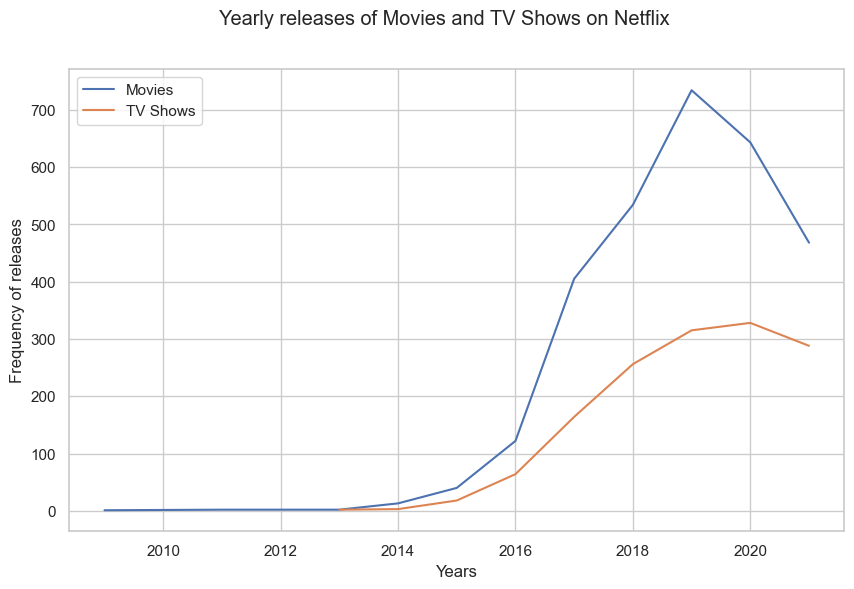

In [25]:
yearly_movie_releases=df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

### Monthly Releases of Movies and TV Shows on Netflix

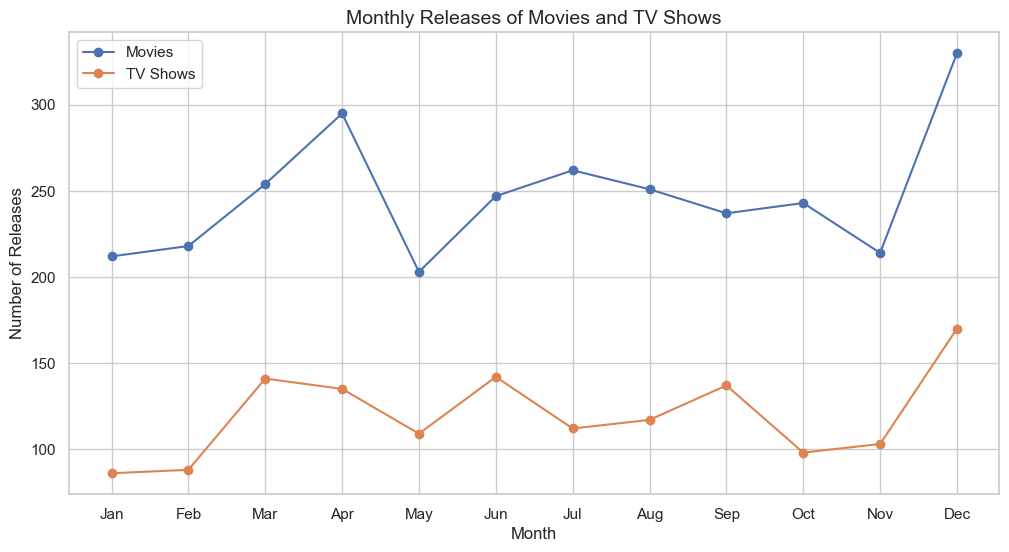

In [26]:
# Monthly Releases

monthly_movie_release = df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release = df[df['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', marker='o')
plt.title('Monthly Releases of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

- Netflix focuses heavily on movie releases, especially during mid-year and end-of-year holidays.
- TV Shows are released more consistently throughout the year but see slight boosts in December and July.
- February tends to have the least releases for both categories, possibly due to it being the shortest month or lower audience engagement.

### Top 10 Directors with most Titles on Netflix

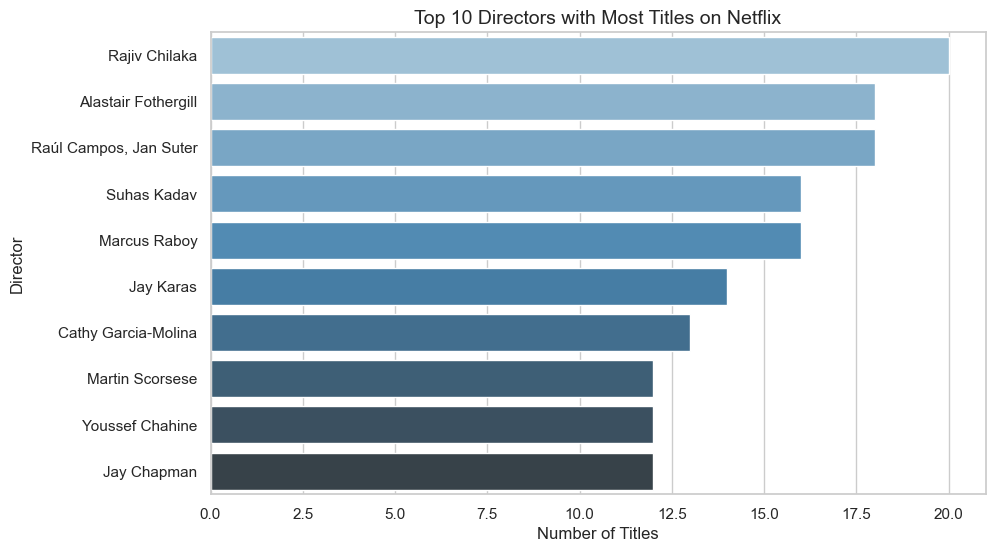

In [27]:
# Top 10 Directors with Most Titles

top_directors = df['director'].value_counts().drop('Not Given').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with Most Titles on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

### Word Cloud for the Movie Titles

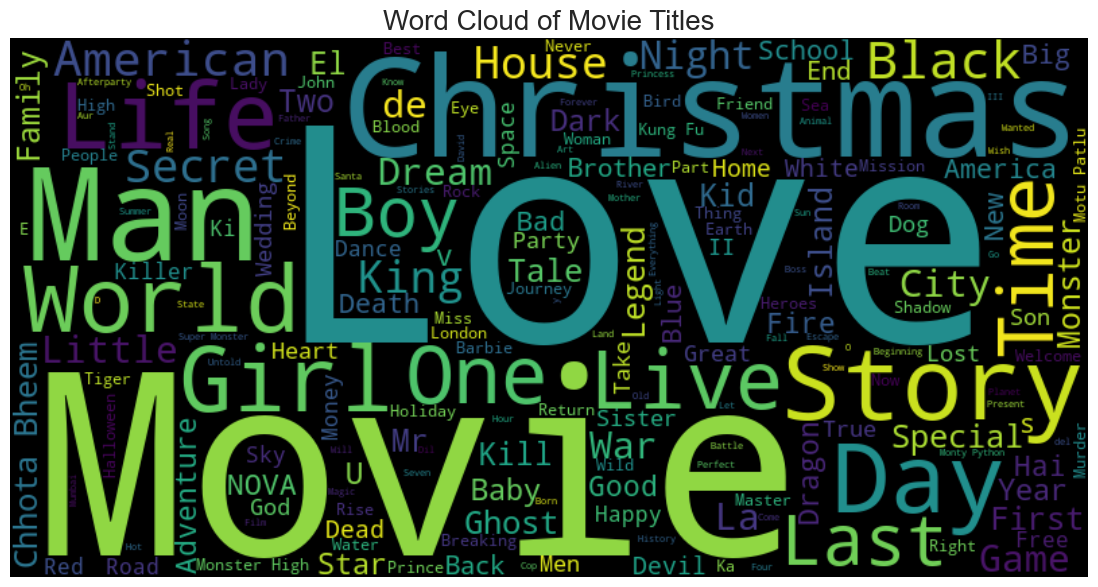

In [28]:
# WordCloud of Movie Titles

movie_titles = df[df['type']=='Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles', fontsize=20)
plt.show()

### Conclusion

- Netflix has more Movies than TV Shows.
- Most content is Rated TV-MA and TV-14.
- Content additions peaked around 2018-2020.
- The United States and India are the top countries producing Netflix content.
- Drama and Comedy are the most popular genres.
- Top directors on Netflix include Rajiv Chilaka, Alastair Fothergill.